In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


IMPORTING LIBRARIES

In [ ]:
%tensorflow_version 2.x
from numpy.random import seed
seed(2)
#from tensorflow import set_random_seed
#set_random_seed(2)
from IPython import display
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.11.0


IMPORTING THE DATA

In [ ]:
pd.options.display.max_rows = 10
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv", sep=",")

df = df.reindex(
    np.random.permutation(df.index)
)
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
469,470,0=Blood Donor,52,f,51.5,81.8,26.3,20.6,7.8,6.74,5.90,88.0,16.3,82.2
592,593,3=Cirrhosis,47,m,42.0,NaN,159.0,102.0,11.0,6.29,5.50,58.0,201.0,79.0
265,266,0=Blood Donor,58,m,41.3,58.9,12.8,23.4,5.4,8.17,5.70,60.0,10.8,70.1
84,85,0=Blood Donor,39,m,43.9,90.1,87.9,60.6,8.6,9.94,4.64,98.0,99.3,66.2
109,110,0=Blood Donor,42,m,44.1,46.8,23.8,19.4,7.0,10.83,6.28,95.0,19.7,73.0


In [ ]:
df[["Label", "Category"]] = (  # Create two new features
    df["Category"]           # from the Policy feature
    .str                         # through the string accessor
    .split("=", expand=True)     # by splitting on " "
                                 # and expanding the result into separate columns
)
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Label
469,470,Blood Donor,52,f,51.5,81.8,26.3,20.6,7.8,6.74,5.90,88.0,16.3,82.2,0
592,593,Cirrhosis,47,m,42.0,NaN,159.0,102.0,11.0,6.29,5.50,58.0,201.0,79.0,3
265,266,Blood Donor,58,m,41.3,58.9,12.8,23.4,5.4,8.17,5.70,60.0,10.8,70.1,0
84,85,Blood Donor,39,m,43.9,90.1,87.9,60.6,8.6,9.94,4.64,98.0,99.3,66.2,0
109,110,Blood Donor,42,m,44.1,46.8,23.8,19.4,7.0,10.83,6.28,95.0,19.7,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,535,suspect Blood Donor,48,m,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8,0s
584,585,Fibrosis,75,f,36.0,NaN,114.0,125.0,14.0,6.65,NaN,57.0,177.0,72.0,2
493,494,Blood Donor,56,f,34.7,90.3,22.7,21.6,3.5,8.07,5.45,67.0,9.0,69.4,0
527,528,Blood Donor,63,f,27.8,85.7,25.4,38.9,4.2,6.06,3.96,63.0,46.0,56.9,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: ignored

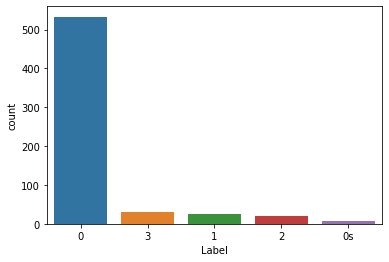

In [ ]:
sns.countplot(df['Label'], label="Count")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


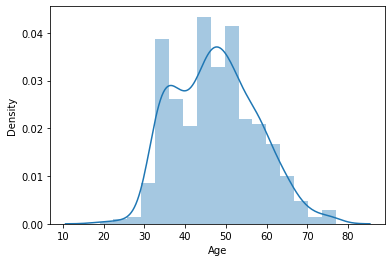

In [ ]:
sns.distplot(df['Age'])

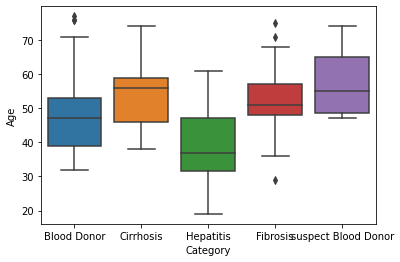

In [ ]:
sns.boxplot(data=df, x='Category', y='Age')

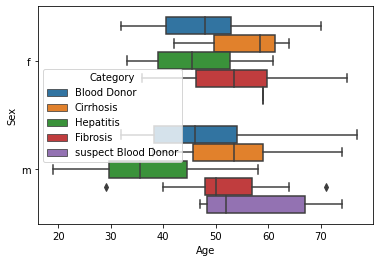

In [ ]:
sns.boxplot(data=df, x='Age', y='Sex', hue ='Category')

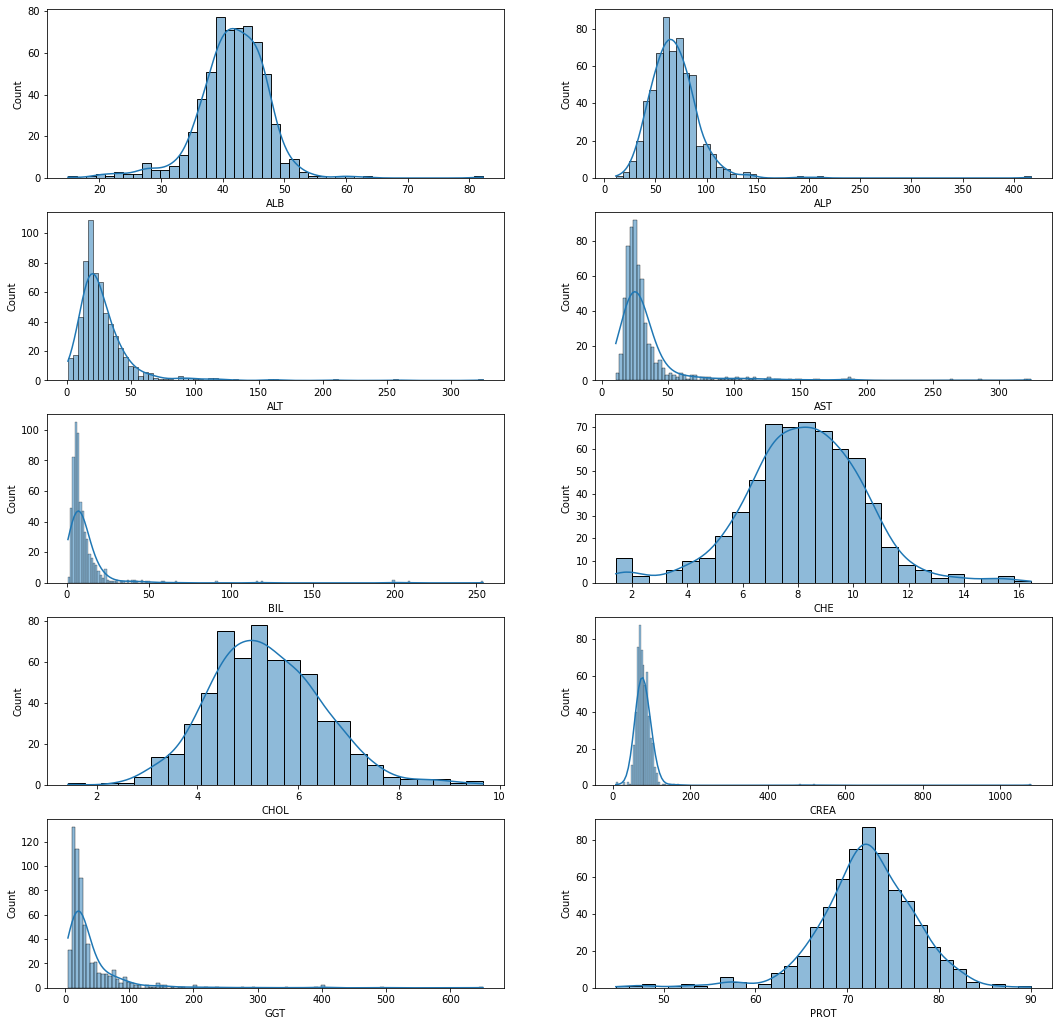

In [ ]:
from matplotlib import pyplot as plt
fig,axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 18))
sns.histplot(data=df, x="ALB", kde=True,ax=axes[0][0])
sns.histplot(data=df, x="ALP", kde=True,ax=axes[0][1])
sns.histplot(data=df, x="ALT", kde=True,ax=axes[1][0])
sns.histplot(data=df, x="AST", kde=True,ax=axes[1][1])
sns.histplot(data=df, x="BIL", kde=True,ax=axes[2][0])
sns.histplot(data=df, x="CHE", kde=True,ax=axes[2][1])
sns.histplot(data=df, x="CHOL", kde=True,ax=axes[3][0])
sns.histplot(data=df, x="CREA", kde=True,ax=axes[3][1])
sns.histplot(data=df, x="GGT", kde=True,ax=axes[4][0])
sns.histplot(data=df, x="PROT", kde=True,ax=axes[4][1])

FEATURE SELECTION :

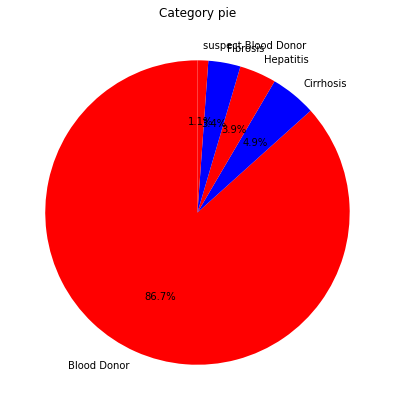

In [ ]:
labels =df['Category'].value_counts(sort = True).index
sizes = df['Category'].value_counts(sort = True)
colors = ["Red","Blue"]
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,)
plt.title('Category pie')
plt.show()

In [ ]:
pd.options.display.max_rows = 10
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv", sep=",")

df = df.reindex(
    np.random.permutation(df.index)
)
df.head()
# Convert categorical variables to numeric and removing NAs
df.fillna(df.median(), inplace=True)
df['Sex'] = df['Sex'].apply(lambda x: 1 if x=='m' else 0)
df['Category'] = df['Category'].apply(lambda x: {'0=Blood Donor': 0, '0s=suspect Blood Donor': 1, '1=Hepatitis': 2, '2=Fibrosis': 3, '3=Cirrhosis': 4}[x])

<ipython-input-11-baeedde8d551>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


In [ ]:
def preprocess_features(df):
  selected_features = df[
    ['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
  processed_features = selected_features.copy()
  return processed_features

def preprocess_targets(df):
  output_targets = df['Category']
  return output_targets

In [ ]:
# Choose the first 83 examples for training.
X_train = preprocess_features(df.head(200))
Y_train = preprocess_targets(df.head(200))
scaler = StandardScaler().fit(X_train.values)
scaledf = scaler.transform(X_train.values)
X_train = pd.DataFrame(scaledf, index=X_train.index, columns=X_train.columns)


# Choose the 20 examples for validation.
x_test = preprocess_features(df.tail(50))
y_test = preprocess_targets(df.tail(50))
vscaled = scaler.transform(x_test.values)
x_test = pd.DataFrame(vscaled, index=x_test.index, columns=x_test.columns)


# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(X_train.describe().round(3))
print("Validation examples summary:")
display.display(x_test.describe().round(3))

print("Training targets summary:")
display.display(Y_train.describe().round(3))
print("Validation targets summary:")
display.display(y_test.describe().round(3))


Training examples summary:


,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000
mean,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000
std,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003
min,-2.687,-1.187,-4.966,-1.325,-1.150,-0.969,-1.121,-3.110,-2.593,-1.018,-0.535,-4.795
25%,-0.849,-1.187,-0.511,-0.493,-0.546,-0.532,-0.545,-0.600,-0.710,-0.217,-0.378,-0.417
50%,-0.171,0.842,0.079,-0.073,-0.243,-0.266,-0.249,-0.026,-0.030,-0.107,-0.245,-0.015
75%,0.700,0.842,0.640,0.427,0.191,0.060,0.249,0.653,0.590,0.073,-0.009,0.597
max,2.732,0.842,2.428,11.149,6.051,6.638,6.382,3.542,3.998,13.762,9.756,2.757


Validation examples summary:


,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,0.152,0.030,0.022,0.170,0.479,0.488,0.551,0.130,-0.146,-0.129,0.263,-0.041
std,1.051,1.004,1.786,0.879,2.351,1.717,4.309,1.026,0.940,0.266,1.203,1.437
min,-1.332,-1.187,-4.142,-1.315,-1.079,-0.715,-1.276,-3.023,-2.052,-1.032,-0.501,-4.643
25%,-0.631,-1.187,-0.721,-0.194,-0.329,-0.428,-0.595,-0.483,-0.696,-0.255,-0.347,-0.393
50%,0.119,0.842,0.079,0.198,-0.060,-0.182,-0.334,0.233,-0.283,-0.146,-0.211,0.071
75%,0.772,0.842,0.729,0.483,0.162,0.154,0.323,0.773,0.324,-0.019,0.305,0.764
max,2.635,0.842,7.632,4.477,13.225,5.861,29.730,3.254,2.514,0.501,5.764,2.662


Training targets summary:


count    200.000
mean       0.340
std        0.995
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        4.000
Name: Category, dtype: float64

Validation targets summary:


count    50.000
mean      0.520
std       1.111
min       0.000
25%       0.000
50%       0.000
75%       0.000
max       4.000
Name: Category, dtype: float64

In [ ]:

# Define the model
# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])
optimizer = tf.keras.optimizers.RMSprop()
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=["mae", "acc"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 12)                396       
                                                                 
 dense_3 (Dense)             (None, 5)                 65        
                                                                 
Total params: 3,373
Trainable params: 3,373
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 200
b_history = model.fit(X_train, Y_train, epochs=EPOCHS,
                    validation_data=(x_test, y_test), verbose=0,
                    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................

0.05999999865889549
0.6319999694824219


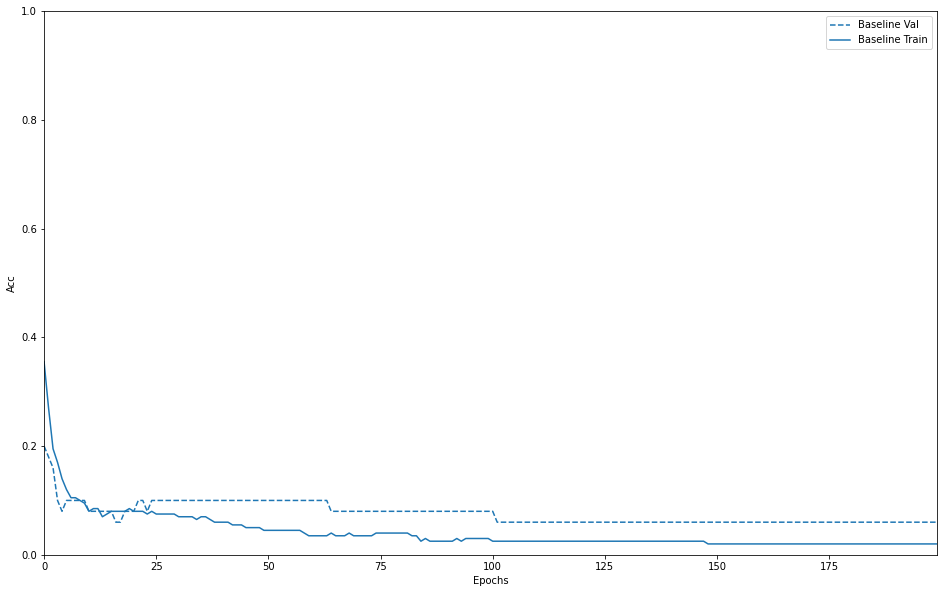

In [ ]:
print(max(b_history.history['val_acc']))
print(min(b_history.history['val_mae']))
import matplotlib.pyplot as plt


def plot_history(histories, key='acc'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('baseline', b_history)])

  

WE Now Use the data set to build our models and train 


In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv')

# Convert categorical variables to numeric
df['Sex'] = df['Sex'].apply(lambda x: 1 if x=='m' else 0)
df['Category'] = df['Category'].apply(lambda x: {'0=Blood Donor': 0, '0s=suspect Blood Donor': 1, '1=Hepatitis': 2, '2=Fibrosis': 3, '3=Cirrhosis': 4}[x])
df = df.drop('Unnamed: 0',axis=1)
df.fillna(df.median(), inplace=True)
# Split the data into training and testing sets
X = df.drop('Category', axis=1)
y = df['Category']
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train.values)
scaledf = scaler.transform(X_train.values)
X_train = pd.DataFrame(scaledf, index=X_train.index, columns=X_train.columns)
vscaled = scaler.transform(x_test.values)
x_test = pd.DataFrame(vscaled, index=x_test.index, columns=x_test.columns)



In [ ]:
#all features included
EPOCHS = 200
optimizer = tf.keras.optimizers.RMSprop(0.001)
# Define the models
baseline_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(5, activation='softmax')
])
baseline_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'acc']) 

In [ ]:
l1_model = keras.Sequential([
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l1(0.1), activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(8, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(5, activation='softmax')
])

In [ ]:
l1_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'acc']) 

In [ ]:
l1_history = l1_model.fit(X_train, Y_train, epochs=EPOCHS,
                    validation_data= (x_test, y_test), verbose=0,
                    callbacks=[PrintDot()])

print(max(l1_history.history['val_acc']))
print(min(l1_history.history['val_mae']))




....................................................................................................
....................................................................................................0.7804877758026123
0.7219512462615967


In [ ]:
# FEATURE SET 2

X2 = X = df.drop(['Category', 'Age','Sex'],axis=1)
y2 = df['Category']
X_train, x_test, Y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train.values)
scaledf = scaler.transform(X_train.values)
X_train = pd.DataFrame(scaledf, index=X_train.index, columns=X_train.columns)
vscaled = scaler.transform(x_test.values)
x_test = pd.DataFrame(vscaled, index=x_test.index, columns=x_test.columns)

EPOCHS = 200
optimizer = tf.keras.optimizers.RMSprop(0.001)

l2_model = keras.Sequential([
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dense(5, activation='softmax')
])




....................................................................................................
....................................................................................................0.8617886304855347
0.7219511866569519


In [ ]:
l2_model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['mae', 'acc'])

l2_history = l2_model.fit(X_train, Y_train, epochs=EPOCHS,
                    validation_data= (x_test, y_test), verbose=0,
                    callbacks=[PrintDot()])

print(max(l2_history.history['val_acc']))
print(min(l2_history.history['val_mae']))

In [ ]:
# FEATURE SET 3 includes all features but using adam optimiser 
X3 = df.drop('Category', axis=1)
y3 = df['Category']
X_train, x_test, Y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)


scaler = StandardScaler().fit(X_train.values)
scaledf = scaler.transform(X_train.values)
X_train = pd.DataFrame(scaledf, index=X_train.index, columns=X_train.columns)
vscaled = scaler.transform(x_test.values)
x_test = pd.DataFrame(vscaled, index=x_test.index, columns=x_test.columns)
l3_model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])





....................................................................................................
....................................................................................................0.8861788511276245
0.7219511866569519


In [ ]:
l3_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['mae', 'acc']) 
l3_history = l3_model.fit(X_train, Y_train, epochs=EPOCHS,
                    validation_data= (x_test, y_test), verbose=0,
                    callbacks=[PrintDot()])
print(max(l3_history.history['val_acc']))
print(min(l3_history.history['val_mae']))

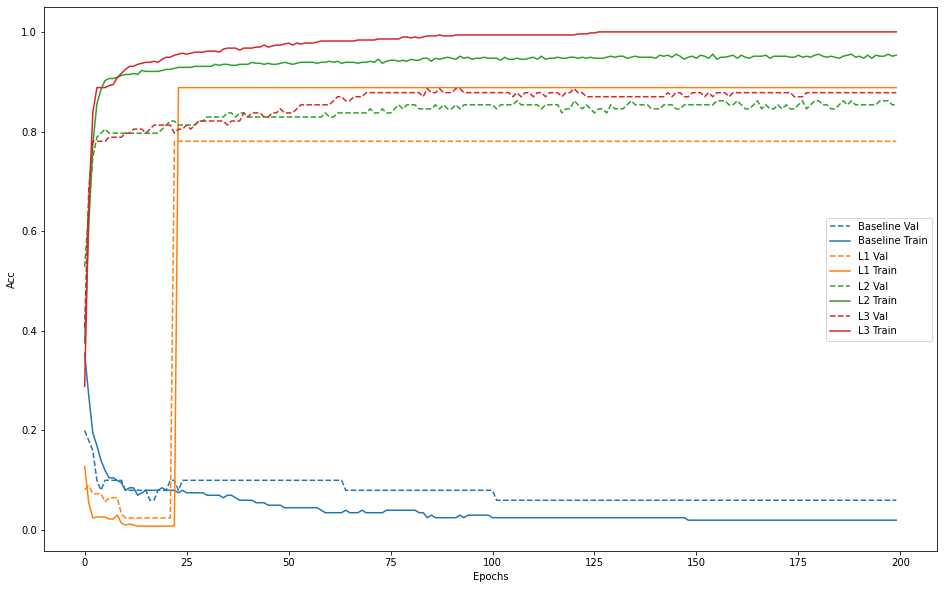

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, key='acc'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

plot_history([('baseline', b_history),
              ('L1', l1_history),
              ('L2', l2_history),
              ('L3', l3_history)])